In [18]:
import os
import shutil
from pathlib import Path

current_dir = Path(os.getcwd()).absolute()
pics_dir = current_dir.joinpath('Team Pics')

#make paths to training, validation, and test directories
train_dir = current_dir.joinpath('train')
validation_dir = current_dir.joinpath('validation')
test_dir = current_dir.joinpath('test')

print(current_dir)

C:\Users\loosm\DSC-680 Applied Data Science\Project 1


In [19]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical')

Found 4176 images belonging to 14 classes.
Found 1382 images belonging to 14 classes.
Found 1393 images belonging to 14 classes.


In [20]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 14)


In [24]:
for data_batch, labels_batch in train_generator:
#     print('data batch shape:', data_batch)
    print('labels batch shape:', labels_batch)
    break

labels batch shape: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [25]:
from keras import models
from keras import layers
from keras import optimizers

#build covnet
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(150, 150, 3)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(14, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 73, 73, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [26]:
history = model.fit_generator(
train_generator,
steps_per_epoch=200,
epochs=20,
validation_data=validation_generator
)


C:\Users\loosm\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
200/200 [==============================] - 83s 410ms/step - loss: 2.5585 - accuracy: 0.1011 - val_loss: 2.2083 - val_accuracy: 0.2243
Epoch 2/20
200/200 [==============================] - 81s 402ms/step - loss: 2.2049 - accuracy: 0.2067 - val_loss: 2.0969 - val_accuracy: 0.2344
Epoch 3/20
200/200 [==============================] - 83s 412ms/step - loss: 2.0840 - accuracy: 0.2534 - val_loss: 1.9956 - val_accuracy: 0.3082
Epoch 4/20
200/200 [==============================] - 79s 393ms/step - loss: 1.9858 - accuracy: 0.2961 - val_loss: 1.9941 - val_accuracy: 0.3126
Epoch 5/20
200/200 [==============================] - 81s 404ms/step - loss: 1.9320 - accuracy: 0.3287 - val_loss: 1.8856 - val_accuracy: 0.3213
Epoch 6/20
200/200 [==============================] - 81s 403ms/step - loss: 1.9020 - accuracy: 0.3513 - val_loss: 1.8175 - val_accuracy: 0.3632
Epoch 7/20
200/200 [==============================] - 81s 406ms/step - loss: 1.8347 - accuracy: 0.3694 - val_loss: 1.7225 - val_ac

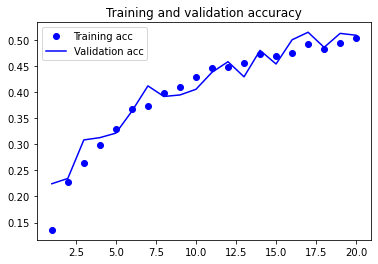

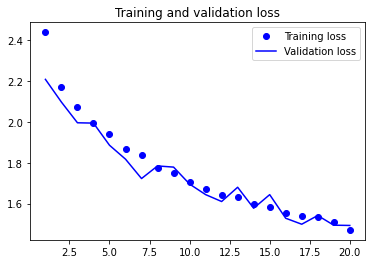

In [27]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
loss, accuracy = model.evaluate_generator(test_generator)
print(f'Test Loss: {loss}\nTest Accuracy:{accuracy}')

C:\Users\loosm\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test Loss: 1.480479121208191
Test Accuracy:0.5247666835784912


In [22]:
predictions = model.predict_classes(test_generator)
predictions

C:\Users\loosm\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

(array([[[[0.05882353, 0.0627451 , 0.07058824],
         [0.04705883, 0.06666667, 0.09019608],
         [0.04705883, 0.0627451 , 0.10980393],
         ...,
         [0.17254902, 0.13333334, 0.09803922],
         [0.16470589, 0.15686275, 0.10980393],
         [0.18431373, 0.18823531, 0.1254902 ]],

        [[0.03529412, 0.06666667, 0.07843138],
         [0.03529412, 0.0627451 , 0.10196079],
         [0.06666667, 0.05490196, 0.08235294],
         ...,
         [0.15294118, 0.13333334, 0.11764707],
         [0.18039216, 0.16078432, 0.08235294],
         [0.20784315, 0.18039216, 0.10980393]],

        [[0.01960784, 0.07450981, 0.08627451],
         [0.03529412, 0.05882353, 0.10588236],
         [0.0509804 , 0.06666667, 0.0627451 ],
         ...,
         [0.14509805, 0.14117648, 0.07058824],
         [0.18823531, 0.16078432, 0.09803922],
         [0.18431373, 0.19215688, 0.09803922]],

        ...,

        [[0.57254905, 0.56078434, 0.49411768],
         [0.5803922 , 0.5686275 , 0.49411768

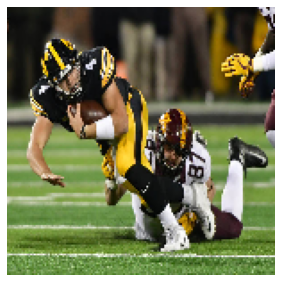

(array([[[[0.77647066, 0.76470596, 0.69803923],
         [0.7686275 , 0.7568628 , 0.6901961 ],
         [0.79215693, 0.7725491 , 0.69803923],
         ...,
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07450981, 0.05490196, 0.03137255]],

        [[0.77647066, 0.76470596, 0.69803923],
         [0.7686275 , 0.7568628 , 0.6901961 ],
         [0.8000001 , 0.7803922 , 0.7058824 ],
         ...,
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07058824, 0.0509804 , 0.03921569],
         [0.06666667, 0.04705883, 0.03529412]],

        [[0.77647066, 0.76470596, 0.69803923],
         [0.7686275 , 0.7568628 , 0.6901961 ],
         [0.7803922 , 0.7607844 , 0.6862745 ],
         ...,
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07058824, 0.04705883, 0.04705883]],

        ...,

        [[0.35686275, 0.36078432, 0.2901961 ],
         [0.35686275, 0.36078432, 0.2901961 

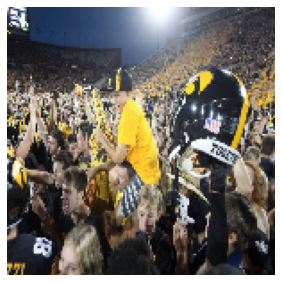

(array([[[[0.20784315, 0.17254902, 0.15294118],
         [0.23137257, 0.19607845, 0.1764706 ],
         [0.21568629, 0.18823531, 0.16470589],
         ...,
         [0.36078432, 0.2901961 , 0.19607845],
         [0.36862746, 0.29803923, 0.20392159],
         [0.36862746, 0.3019608 , 0.20000002]],

        [[0.24705884, 0.21176472, 0.19215688],
         [0.2392157 , 0.20392159, 0.18431373],
         [0.18823531, 0.16078432, 0.13725491],
         ...,
         [0.3647059 , 0.29411766, 0.20000002],
         [0.3647059 , 0.29411766, 0.20000002],
         [0.35686275, 0.2901961 , 0.18823531]],

        [[0.21568629, 0.18039216, 0.16078432],
         [0.19607845, 0.16078432, 0.14117648],
         [0.19607845, 0.16862746, 0.14509805],
         ...,
         [0.36862746, 0.29803923, 0.20392159],
         [0.36078432, 0.2901961 , 0.19607845],
         [0.34901962, 0.28235295, 0.18039216]],

        ...,

        [[0.16078432, 0.18039216, 0.09411766],
         [0.14117648, 0.16078432, 0.07450981

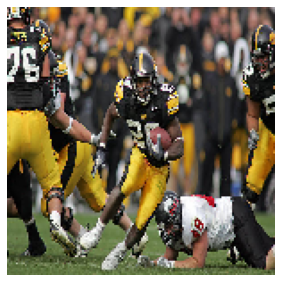

(array([[[[0.14901961, 0.07450981, 0.08235294],
         [0.18431373, 0.09803922, 0.10980393],
         [0.22352943, 0.10980393, 0.12941177],
         ...,
         [0.6156863 , 0.48627454, 0.34901962],
         [0.48235297, 0.34901962, 0.2392157 ],
         [0.41960788, 0.2901961 , 0.16862746]],

        [[0.19607845, 0.10980393, 0.12156864],
         [0.227451  , 0.12156864, 0.14117648],
         [0.23529413, 0.12156864, 0.14117648],
         ...,
         [0.6039216 , 0.47450984, 0.3372549 ],
         [0.49411768, 0.36078432, 0.2509804 ],
         [0.41176474, 0.29411766, 0.18431373]],

        [[0.21960786, 0.12156864, 0.13725491],
         [0.24705884, 0.1254902 , 0.14901961],
         [0.227451  , 0.1137255 , 0.13333334],
         ...,
         [0.62352943, 0.49411768, 0.35686275],
         [0.53333336, 0.40000004, 0.2901961 ],
         [0.40784317, 0.29803923, 0.20392159]],

        ...,

        [[0.27058825, 0.27450982, 0.29411766],
         [0.28627452, 0.2901961 , 0.30980393

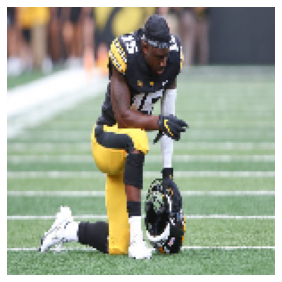

(array([[[[0.15294118, 0.25490198, 0.3529412 ],
         [0.14509805, 0.24705884, 0.34509805],
         [0.18039216, 0.2627451 , 0.36862746],
         ...,
         [0.22352943, 0.27450982, 0.30588236],
         [0.24705884, 0.29803923, 0.32941177],
         [0.2509804 , 0.3019608 , 0.33333334]],

        [[0.18039216, 0.22352943, 0.30980393],
         [0.16862746, 0.21176472, 0.29803923],
         [0.19607845, 0.2509804 , 0.3529412 ],
         ...,
         [0.23529413, 0.28627452, 0.31764707],
         [0.2509804 , 0.3019608 , 0.33333334],
         [0.24705884, 0.29803923, 0.32941177]],

        [[0.20784315, 0.21176472, 0.29411766],
         [0.20000002, 0.20392159, 0.28627452],
         [0.20392159, 0.24705884, 0.33333334],
         ...,
         [0.24313727, 0.29411766, 0.3254902 ],
         [0.2509804 , 0.3019608 , 0.33333334],
         [0.24313727, 0.29411766, 0.3254902 ]],

        ...,

        [[0.09411766, 0.09019608, 0.07450981],
         [0.09411766, 0.09019608, 0.07450981

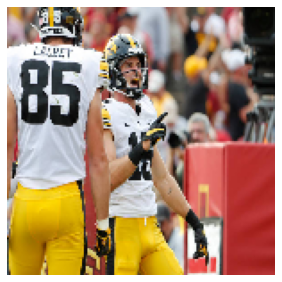

(array([[[[0.03921569, 0.04313726, 0.0509804 ],
         [0.03921569, 0.04313726, 0.0509804 ],
         [0.01568628, 0.01568628, 0.01568628],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.03921569, 0.04313726, 0.0509804 ],
         [0.02352941, 0.02745098, 0.03529412],
         [0.03137255, 0.03137255, 0.03137255],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.06666667, 0.07058824, 0.07843138],
         [0.00392157, 0.00784314, 0.01568628],
         [0.02352941, 0.02352941, 0.02352941],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        ...,

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157

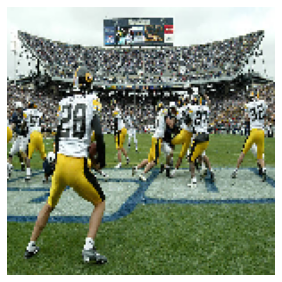

(array([[[[1.        , 0.6       , 0.58431375],
         [0.9843138 , 0.6117647 , 0.5882353 ],
         [1.        , 0.6156863 , 0.6039216 ],
         ...,
         [0.49411768, 0.06666667, 0.05490196],
         [0.49411768, 0.06666667, 0.05490196],
         [0.47450984, 0.0627451 , 0.04705883]],

        [[0.9843138 , 0.454902  , 0.43921572],
         [0.9843138 , 0.4784314 , 0.454902  ],
         [1.        , 0.5019608 , 0.48235297],
         ...,
         [0.49411768, 0.06666667, 0.05490196],
         [0.49411768, 0.06666667, 0.05490196],
         [0.4901961 , 0.0627451 , 0.0509804 ]],

        [[1.        , 0.36862746, 0.36078432],
         [1.        , 0.37647063, 0.3647059 ],
         [1.        , 0.3647059 , 0.36862746],
         ...,
         [0.49411768, 0.06666667, 0.05490196],
         [0.49411768, 0.06666667, 0.05490196],
         [0.5058824 , 0.05882353, 0.05490196]],

        ...,

        [[0.09019608, 0.08627451, 0.06666667],
         [0.13333334, 0.10588236, 0.07450981

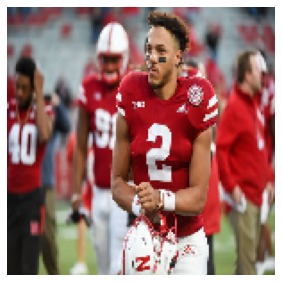

(array([[[[0.5803922 , 0.6       , 0.58431375],
         [0.5803922 , 0.6       , 0.58431375],
         [0.5803922 , 0.6       , 0.58431375],
         ...,
         [0.58431375, 0.5176471 , 0.40000004],
         [0.21960786, 0.18823531, 0.13725491],
         [0.16078432, 0.13725491, 0.08235294]],

        [[0.29803923, 0.28235295, 0.27058825],
         [0.28235295, 0.26666668, 0.25490198],
         [0.29803923, 0.28235295, 0.27058825],
         ...,
         [0.58431375, 0.5176471 , 0.40784317],
         [0.29411766, 0.27058825, 0.18431373],
         [0.2509804 , 0.2392157 , 0.18039216]],

        [[0.23137257, 0.20784315, 0.15294118],
         [0.23137257, 0.20784315, 0.15294118],
         [0.2392157 , 0.21568629, 0.16078432],
         ...,
         [0.5647059 , 0.49803925, 0.39607847],
         [0.43529415, 0.4156863 , 0.3019608 ],
         [0.4431373 , 0.39607847, 0.3019608 ]],

        ...,

        [[0.32156864, 0.39607847, 0.21568629],
         [0.34901962, 0.42352945, 0.24313727

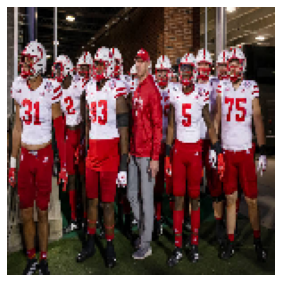

(array([[[[0.18431373, 0.21176472, 0.2509804 ],
         [0.28235295, 0.29411766, 0.3137255 ],
         [0.72156864, 0.6509804 , 0.6509804 ],
         ...,
         [0.34901962, 0.45882356, 0.37254903],
         [0.3372549 , 0.44705886, 0.36078432],
         [0.32941177, 0.4431373 , 0.35686275]],

        [[0.10196079, 0.14117648, 0.18039216],
         [0.18039216, 0.20000002, 0.22352943],
         [0.69803923, 0.61960787, 0.5764706 ],
         ...,
         [0.30588236, 0.41960788, 0.33333334],
         [0.29411766, 0.40784317, 0.32156864],
         [0.3254902 , 0.46274513, 0.36862746]],

        [[0.6901961 , 0.7372549 , 0.7843138 ],
         [0.10980393, 0.13725491, 0.1764706 ],
         [0.58431375, 0.5294118 , 0.49411768],
         ...,
         [0.3529412 , 0.48627454, 0.3921569 ],
         [0.3254902 , 0.45882356, 0.3647059 ],
         [0.30980393, 0.4431373 , 0.34901962]],

        ...,

        [[0.6666667 , 0.7725491 , 0.8862746 ],
         [0.7137255 , 0.8313726 , 0.94117653

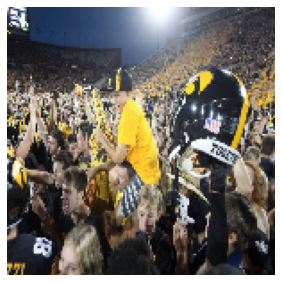

(array([[[[0.5647059 , 0.6039216 , 0.7019608 ],
         [0.5254902 , 0.41960788, 0.48627454],
         [0.43529415, 0.29411766, 0.33333334],
         ...,
         [0.27450982, 0.09019608, 0.23137257],
         [0.2901961 , 0.08627451, 0.23529413],
         [0.32156864, 0.09411766, 0.2509804 ]],

        [[0.5137255 , 0.58431375, 0.6627451 ],
         [0.6901961 , 0.5803922 , 0.67058825],
         [0.5882353 , 0.21176472, 0.26666668],
         ...,
         [0.2784314 , 0.07450981, 0.22352943],
         [0.29803923, 0.07843138, 0.23137257],
         [0.3254902 , 0.08235294, 0.24313727]],

        [[0.6       , 0.5411765 , 0.62352943],
         [0.5921569 , 0.5058824 , 0.5568628 ],
         [0.45882356, 0.21176472, 0.25490198],
         ...,
         [0.28235295, 0.06666667, 0.21960786],
         [0.29803923, 0.07058824, 0.227451  ],
         [0.32941177, 0.07450981, 0.2392157 ]],

        ...,

        [[0.4666667 , 0.59607846, 0.3803922 ],
         [0.43529415, 0.59607846, 0.37647063

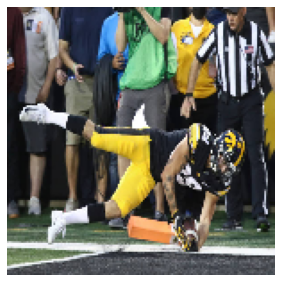

(array([[[[0.77647066, 0.76470596, 0.69803923],
         [0.7686275 , 0.7568628 , 0.6901961 ],
         [0.79215693, 0.7725491 , 0.69803923],
         ...,
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07450981, 0.05490196, 0.03137255]],

        [[0.77647066, 0.76470596, 0.69803923],
         [0.7686275 , 0.7568628 , 0.6901961 ],
         [0.8000001 , 0.7803922 , 0.7058824 ],
         ...,
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07058824, 0.0509804 , 0.03921569],
         [0.06666667, 0.04705883, 0.03529412]],

        [[0.77647066, 0.76470596, 0.69803923],
         [0.7686275 , 0.7568628 , 0.6901961 ],
         [0.7803922 , 0.7607844 , 0.6862745 ],
         ...,
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07058824, 0.04705883, 0.04705883]],

        ...,

        [[0.35686275, 0.36078432, 0.2901961 ],
         [0.35686275, 0.36078432, 0.2901961 

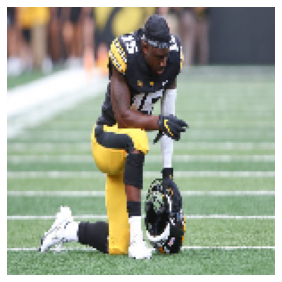

(array([[[[0.05882353, 0.0627451 , 0.07058824],
         [0.04705883, 0.06666667, 0.09019608],
         [0.04705883, 0.0627451 , 0.10980393],
         ...,
         [0.17254902, 0.13333334, 0.09803922],
         [0.16470589, 0.15686275, 0.10980393],
         [0.18431373, 0.18823531, 0.1254902 ]],

        [[0.03529412, 0.06666667, 0.07843138],
         [0.03529412, 0.0627451 , 0.10196079],
         [0.06666667, 0.05490196, 0.08235294],
         ...,
         [0.15294118, 0.13333334, 0.11764707],
         [0.18039216, 0.16078432, 0.08235294],
         [0.20784315, 0.18039216, 0.10980393]],

        [[0.01960784, 0.07450981, 0.08627451],
         [0.03529412, 0.05882353, 0.10588236],
         [0.0509804 , 0.06666667, 0.0627451 ],
         ...,
         [0.14509805, 0.14117648, 0.07058824],
         [0.18823531, 0.16078432, 0.09803922],
         [0.18431373, 0.19215688, 0.09803922]],

        ...,

        [[0.57254905, 0.56078434, 0.49411768],
         [0.5803922 , 0.5686275 , 0.49411768

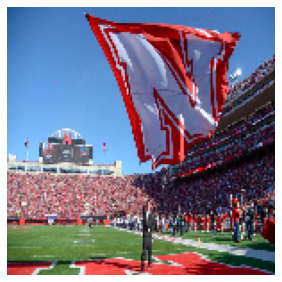

(array([[[[0.9333334 , 0.9803922 , 0.96470594],
         [0.9333334 , 0.9803922 , 0.96470594],
         [0.92549026, 0.9725491 , 0.9568628 ],
         ...,
         [0.9607844 , 0.9960785 , 0.9921569 ],
         [0.9686275 , 1.        , 1.        ],
         [0.9803922 , 1.        , 0.9960785 ]],

        [[0.93725497, 0.9843138 , 0.9686275 ],
         [0.93725497, 0.9843138 , 0.9686275 ],
         [0.9294118 , 0.97647065, 0.9607844 ],
         ...,
         [0.9725491 , 0.9960785 , 0.9960785 ],
         [0.97647065, 1.        , 1.        ],
         [0.9843138 , 1.        , 0.9960785 ]],

        [[0.94117653, 0.98823535, 0.9725491 ],
         [0.94117653, 0.98823535, 0.9725491 ],
         [0.93725497, 0.9843138 , 0.9686275 ],
         ...,
         [0.98823535, 0.9921569 , 1.        ],
         [0.9960785 , 1.        , 1.        ],
         [0.9960785 , 0.9960785 , 0.9960785 ]],

        ...,

        [[0.21960786, 0.31764707, 0.09411766],
         [0.2509804 , 0.36862746, 0.11764707

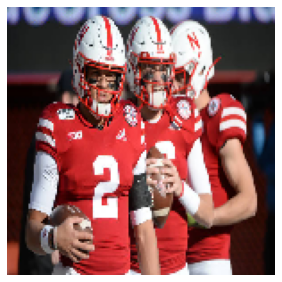

(array([[[[0.5058824 , 0.3803922 , 0.42352945],
         [0.50980395, 0.38431376, 0.427451  ],
         [0.53333336, 0.41176474, 0.4431373 ],
         ...,
         [0.8196079 , 0.52156866, 0.227451  ],
         [0.78823537, 0.5058824 , 0.27450982],
         [0.7568628 , 0.4901961 , 0.29803923]],

        [[0.4901961 , 0.3529412 , 0.3803922 ],
         [0.5137255 , 0.37647063, 0.4039216 ],
         [0.56078434, 0.41960788, 0.45882356],
         ...,
         [0.8235295 , 0.54901963, 0.3137255 ],
         [0.80392164, 0.5411765 , 0.3647059 ],
         [0.7803922 , 0.5529412 , 0.40784317]],

        [[0.5019608 , 0.35686275, 0.38431376],
         [0.54509807, 0.40000004, 0.427451  ],
         [0.60784316, 0.45882356, 0.5019608 ],
         ...,
         [0.8235295 , 0.5647059 , 0.36862746],
         [0.81568635, 0.5686275 , 0.43137258],
         [0.8196079 , 0.62352943, 0.5176471 ]],

        ...,

        [[0.08627451, 0.07843138, 0.09803922],
         [0.25490198, 0.32156864, 0.25882354

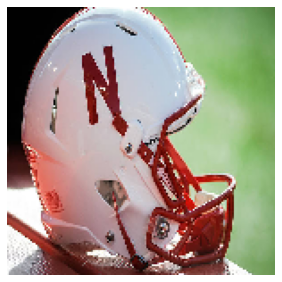

(array([[[[0.03921569, 0.04313726, 0.0509804 ],
         [0.03921569, 0.04313726, 0.0509804 ],
         [0.01568628, 0.01568628, 0.01568628],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.03921569, 0.04313726, 0.0509804 ],
         [0.02352941, 0.02745098, 0.03529412],
         [0.03137255, 0.03137255, 0.03137255],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.06666667, 0.07058824, 0.07843138],
         [0.00392157, 0.00784314, 0.01568628],
         [0.02352941, 0.02352941, 0.02352941],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        ...,

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157

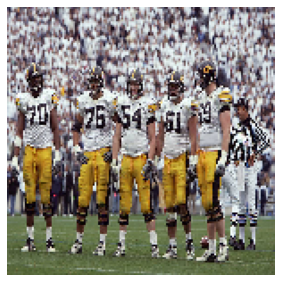

(array([[[[0.77647066, 0.76470596, 0.69803923],
         [0.7686275 , 0.7568628 , 0.6901961 ],
         [0.79215693, 0.7725491 , 0.69803923],
         ...,
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07450981, 0.05490196, 0.03137255]],

        [[0.77647066, 0.76470596, 0.69803923],
         [0.7686275 , 0.7568628 , 0.6901961 ],
         [0.8000001 , 0.7803922 , 0.7058824 ],
         ...,
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07058824, 0.0509804 , 0.03921569],
         [0.06666667, 0.04705883, 0.03529412]],

        [[0.77647066, 0.76470596, 0.69803923],
         [0.7686275 , 0.7568628 , 0.6901961 ],
         [0.7803922 , 0.7607844 , 0.6862745 ],
         ...,
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07058824, 0.04705883, 0.04705883]],

        ...,

        [[0.35686275, 0.36078432, 0.2901961 ],
         [0.35686275, 0.36078432, 0.2901961 

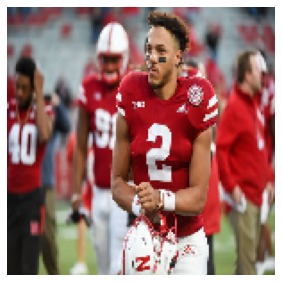

(array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.3254902 , 0.49803925, 0.2509804 ],
         [0.31764707, 0.4901961 , 0.24313727],
         [0.3137255 , 0.48627454, 0.2392157 ]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.32941177, 0.5019608 , 0.25490198],
         [0.32156864, 0.49411768, 0.24705884],
         [0.3137255 , 0.48627454, 0.2392157 ]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.33333334, 0.5058824 , 0.25882354],
         [0.3254902 , 0.49803925, 0.2509804 ],
         [0.31764707, 0.4901961 , 0.24313727]],

        ...,

        [[0.96470594, 0.9725491 , 0.9686275 ],
         [0.86666673, 0.8705883 , 0.89019614

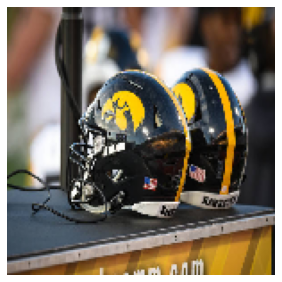

(array([[[[0.22352943, 0.2784314 , 0.13725491],
         [0.22352943, 0.2784314 , 0.13725491],
         [0.227451  , 0.28235295, 0.14117648],
         ...,
         [0.32941177, 0.26666668, 0.1764706 ],
         [0.3254902 , 0.2627451 , 0.17254902],
         [0.3372549 , 0.2509804 , 0.16862746]],

        [[0.22352943, 0.28235295, 0.12156864],
         [0.22352943, 0.28235295, 0.12156864],
         [0.227451  , 0.28627452, 0.1254902 ],
         ...,
         [0.29803923, 0.2784314 , 0.19215688],
         [0.29411766, 0.27450982, 0.18823531],
         [0.2901961 , 0.26666668, 0.18039216]],

        [[0.22352943, 0.28235295, 0.1137255 ],
         [0.22352943, 0.28235295, 0.1137255 ],
         [0.227451  , 0.28627452, 0.11764707],
         ...,
         [0.27450982, 0.2901961 , 0.20000002],
         [0.27058825, 0.28627452, 0.19607845],
         [0.25882354, 0.27450982, 0.18431373]],

        ...,

        [[0.11764707, 0.21960786, 0.08235294],
         [0.15294118, 0.23137257, 0.12156864

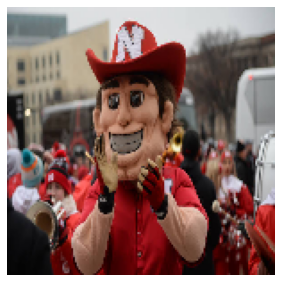

(array([[[[0.3254902 , 0.32941177, 0.26666668],
         [0.46274513, 0.27450982, 0.42352945],
         [1.        , 0.9960785 , 0.8980393 ],
         ...,
         [0.44705886, 0.4156863 , 0.40784317],
         [0.6039216 , 0.5686275 , 0.5882353 ],
         [0.654902  , 0.6431373 , 0.67058825]],

        [[0.6666667 , 0.5411765 , 0.49803925],
         [0.        , 0.03137255, 0.02745098],
         [1.        , 0.9803922 , 0.9725491 ],
         ...,
         [0.27058825, 0.2509804 , 0.26666668],
         [0.45882356, 0.4431373 , 0.44705886],
         [0.54901963, 0.5411765 , 0.5529412 ]],

        [[0.8000001 , 0.67058825, 0.6509804 ],
         [0.16862746, 0.16078432, 0.20392159],
         [0.97647065, 0.97647065, 1.        ],
         ...,
         [0.13725491, 0.12941177, 0.14901961],
         [0.3019608 , 0.29803923, 0.2901961 ],
         [0.47450984, 0.4666667 , 0.47058827]],

        ...,

        [[0.34117648, 0.427451  , 0.23529413],
         [0.36078432, 0.44705886, 0.25490198

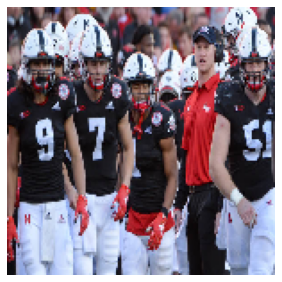

(array([[[[0.24313727, 0.227451  , 0.28627452],
         [0.19215688, 0.18039216, 0.3019608 ],
         [0.62352943, 0.6509804 , 0.7137255 ],
         ...,
         [0.42352945, 0.36862746, 0.41960788],
         [0.3647059 , 0.2784314 , 0.2901961 ],
         [0.4431373 , 0.36078432, 0.38823533]],

        [[0.36078432, 0.3254902 , 0.44705886],
         [0.10196079, 0.09019608, 0.17254902],
         [0.54509807, 0.5568628 , 0.62352943],
         ...,
         [0.45882356, 0.37647063, 0.41176474],
         [0.39607847, 0.32156864, 0.3372549 ],
         [0.63529414, 0.58431375, 0.56078434]],

        [[0.5254902 , 0.454902  , 0.5019608 ],
         [0.23529413, 0.18039216, 0.23137257],
         [0.3647059 , 0.36862746, 0.43921572],
         ...,
         [0.5686275 , 0.5568628 , 0.6       ],
         [0.64705884, 0.654902  , 0.7019608 ],
         [0.70980394, 0.7137255 , 0.73333335]],

        ...,

        [[0.29411766, 0.3529412 , 0.18431373],
         [0.34117648, 0.40000004, 0.23137257

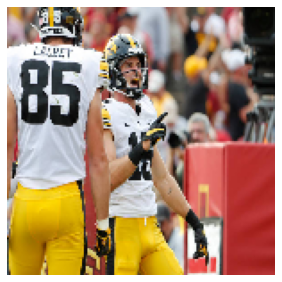

(array([[[[0.3254902 , 0.32941177, 0.26666668],
         [0.46274513, 0.27450982, 0.42352945],
         [1.        , 0.9960785 , 0.8980393 ],
         ...,
         [0.44705886, 0.4156863 , 0.40784317],
         [0.6039216 , 0.5686275 , 0.5882353 ],
         [0.654902  , 0.6431373 , 0.67058825]],

        [[0.6666667 , 0.5411765 , 0.49803925],
         [0.        , 0.03137255, 0.02745098],
         [1.        , 0.9803922 , 0.9725491 ],
         ...,
         [0.27058825, 0.2509804 , 0.26666668],
         [0.45882356, 0.4431373 , 0.44705886],
         [0.54901963, 0.5411765 , 0.5529412 ]],

        [[0.8000001 , 0.67058825, 0.6509804 ],
         [0.16862746, 0.16078432, 0.20392159],
         [0.97647065, 0.97647065, 1.        ],
         ...,
         [0.13725491, 0.12941177, 0.14901961],
         [0.3019608 , 0.29803923, 0.2901961 ],
         [0.47450984, 0.4666667 , 0.47058827]],

        ...,

        [[0.34117648, 0.427451  , 0.23529413],
         [0.36078432, 0.44705886, 0.25490198

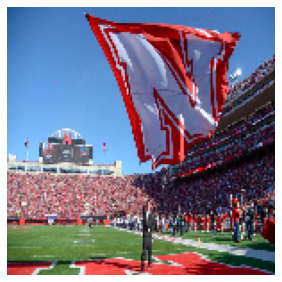

(array([[[[0.02745098, 0.05490196, 0.09411766],
         [0.03137255, 0.05882353, 0.09803922],
         [0.03921569, 0.06666667, 0.10588236],
         ...,
         [0.20000002, 0.36862746, 0.5058824 ],
         [0.08235294, 0.18823531, 0.25490198],
         [0.49411768, 0.5803922 , 0.6745098 ]],

        [[0.03137255, 0.05882353, 0.09803922],
         [0.03529412, 0.0627451 , 0.10196079],
         [0.03921569, 0.06666667, 0.10588236],
         ...,
         [0.20000002, 0.36862746, 0.5058824 ],
         [0.08235294, 0.18823531, 0.25490198],
         [0.4901961 , 0.5764706 , 0.67058825]],

        [[0.03529412, 0.0627451 , 0.10196079],
         [0.03921569, 0.06666667, 0.10588236],
         [0.03921569, 0.06666667, 0.10588236],
         ...,
         [0.20000002, 0.36862746, 0.5058824 ],
         [0.08235294, 0.18823531, 0.25490198],
         [0.48627454, 0.57254905, 0.6666667 ]],

        ...,

        [[0.37647063, 0.3921569 , 0.39607847],
         [0.18039216, 0.18823531, 0.18431373

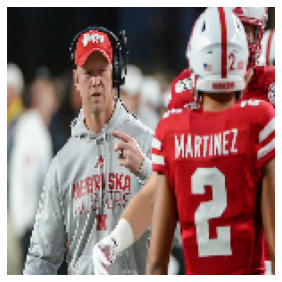

(array([[[[0.5803922 , 0.6       , 0.58431375],
         [0.5803922 , 0.6       , 0.58431375],
         [0.5803922 , 0.6       , 0.58431375],
         ...,
         [0.58431375, 0.5176471 , 0.40000004],
         [0.21960786, 0.18823531, 0.13725491],
         [0.16078432, 0.13725491, 0.08235294]],

        [[0.29803923, 0.28235295, 0.27058825],
         [0.28235295, 0.26666668, 0.25490198],
         [0.29803923, 0.28235295, 0.27058825],
         ...,
         [0.58431375, 0.5176471 , 0.40784317],
         [0.29411766, 0.27058825, 0.18431373],
         [0.2509804 , 0.2392157 , 0.18039216]],

        [[0.23137257, 0.20784315, 0.15294118],
         [0.23137257, 0.20784315, 0.15294118],
         [0.2392157 , 0.21568629, 0.16078432],
         ...,
         [0.5647059 , 0.49803925, 0.39607847],
         [0.43529415, 0.4156863 , 0.3019608 ],
         [0.4431373 , 0.39607847, 0.3019608 ]],

        ...,

        [[0.32156864, 0.39607847, 0.21568629],
         [0.34901962, 0.42352945, 0.24313727

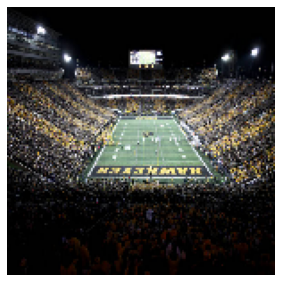

(array([[[[0.9490197 , 0.77647066, 0.6784314 ],
         [0.7843138 , 0.54509807, 0.43529415],
         [0.5529412 , 0.33333334, 0.19607845],
         ...,
         [0.90196085, 0.67058825, 0.20000002],
         [0.9921569 , 0.7294118 , 0.21568629],
         [0.8745099 , 0.654902  , 0.21960786]],

        [[0.63529414, 0.45098042, 0.34117648],
         [0.90196085, 0.69803923, 0.5019608 ],
         [0.5058824 , 0.29411766, 0.        ],
         ...,
         [0.6901961 , 0.42352945, 0.03529412],
         [0.9921569 , 0.7254902 , 0.227451  ],
         [1.        , 0.73333335, 0.23529413]],

        [[0.5882353 , 0.41176474, 0.19607845],
         [0.87843144, 0.68235296, 0.54509807],
         [0.5411765 , 0.3019608 , 0.        ],
         ...,
         [0.9058824 , 0.68235296, 0.23137257],
         [0.9960785 , 0.7803922 , 0.27450982],
         [0.95294124, 0.69411767, 0.16078432]],

        ...,

        [[0.30980393, 0.4156863 , 0.24705884],
         [0.37254903, 0.4784314 , 0.30980393

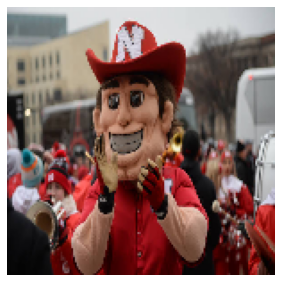

(array([[[[0.6039216 , 0.3803922 , 0.27450982],
         [0.7176471 , 0.5529412 , 0.38823533],
         [0.6156863 , 0.4431373 , 0.30588236],
         ...,
         [0.74509805, 0.30980393, 0.23137257],
         [0.72156864, 0.28235295, 0.18823531],
         [0.6627451 , 0.20392159, 0.13333334]],

        [[0.7294118 , 0.4666667 , 0.36078432],
         [0.6784314 , 0.4784314 , 0.3019608 ],
         [0.6156863 , 0.4039216 , 0.2627451 ],
         ...,
         [0.7725491 , 0.23137257, 0.18823531],
         [0.7490196 , 0.14901961, 0.15686275],
         [0.7176471 , 0.09019608, 0.12156864]],

        [[0.6784314 , 0.35686275, 0.2627451 ],
         [0.70980394, 0.43529415, 0.29411766],
         [0.65882355, 0.3647059 , 0.20784315],
         ...,
         [0.7960785 , 0.1254902 , 0.15686275],
         [0.7607844 , 0.09803922, 0.11764707],
         [0.74509805, 0.10196079, 0.10588236]],

        ...,

        [[0.38431376, 0.43921572, 0.20784315],
         [0.43137258, 0.48235297, 0.27450982

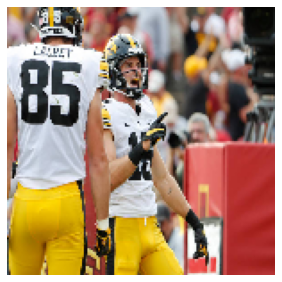

(array([[[[0.4901961 , 0.3137255 , 0.33333334],
         [0.48235297, 0.35686275, 0.36078432],
         [0.54901963, 0.40000004, 0.39607847],
         ...,
         [0.21176472, 0.20392159, 0.28627452],
         [0.13725491, 0.13725491, 0.18431373],
         [0.17254902, 0.18823531, 0.23529413]],

        [[0.44705886, 0.30588236, 0.3137255 ],
         [0.45882356, 0.3254902 , 0.32941177],
         [0.47450984, 0.34117648, 0.33333334],
         ...,
         [0.14117648, 0.15686275, 0.20392159],
         [0.11764707, 0.12941177, 0.18823531],
         [0.16862746, 0.18431373, 0.23137257]],

        [[0.41960788, 0.3019608 , 0.3019608 ],
         [0.43921572, 0.30588236, 0.30980393],
         [0.43529415, 0.3137255 , 0.3019608 ],
         ...,
         [0.12156864, 0.14901961, 0.18039216],
         [0.10980393, 0.13333334, 0.19607845],
         [0.14117648, 0.15686275, 0.20392159]],

        ...,

        [[0.05490196, 0.05490196, 0.0627451 ],
         [0.04705883, 0.04705883, 0.05490196

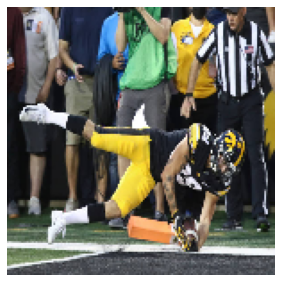

(array([[[[0.5921569 , 0.52156866, 0.5137255 ],
         [0.59607846, 0.5254902 , 0.5176471 ],
         [0.6       , 0.52156866, 0.5176471 ],
         ...,
         [0.07450981, 0.03529412, 0.03137255],
         [0.07450981, 0.03529412, 0.03137255],
         [0.07450981, 0.03529412, 0.03137255]],

        [[0.6       , 0.5294118 , 0.52156866],
         [0.60784316, 0.5372549 , 0.5294118 ],
         [0.6117647 , 0.53333336, 0.5294118 ],
         ...,
         [0.07450981, 0.03529412, 0.03137255],
         [0.07450981, 0.03529412, 0.03137255],
         [0.07450981, 0.03529412, 0.03137255]],

        [[0.60784316, 0.5372549 , 0.5294118 ],
         [0.6156863 , 0.54509807, 0.5372549 ],
         [0.6156863 , 0.5372549 , 0.53333336],
         ...,
         [0.07450981, 0.03529412, 0.03137255],
         [0.07450981, 0.03529412, 0.03137255],
         [0.07450981, 0.03529412, 0.03137255]],

        ...,

        [[0.43529415, 0.6117647 , 0.38823533],
         [0.3921569 , 0.5882353 , 0.35686275

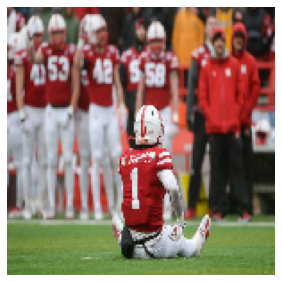

(array([[[[0.7137255 , 0.69411767, 0.70980394],
         [0.7568628 , 0.7254902 , 0.7176471 ],
         [0.7725491 , 0.7294118 , 0.7137255 ],
         ...,
         [0.7725491 , 0.6862745 , 0.69803923],
         [0.8196079 , 0.7372549 , 0.7254902 ],
         [0.8078432 , 0.70980394, 0.6901961 ]],

        [[0.7568628 , 0.75294125, 0.77647066],
         [0.80392164, 0.78823537, 0.79215693],
         [0.8000001 , 0.7686275 , 0.7607844 ],
         ...,
         [0.75294125, 0.6666667 , 0.6784314 ],
         [0.80392164, 0.72156864, 0.70980394],
         [0.8000001 , 0.7019608 , 0.68235296]],

        [[0.75294125, 0.76470596, 0.79215693],
         [0.80392164, 0.7960785 , 0.81568635],
         [0.8000001 , 0.7843138 , 0.7803922 ],
         ...,
         [0.7137255 , 0.627451  , 0.6392157 ],
         [0.7686275 , 0.6862745 , 0.6745098 ],
         [0.7803922 , 0.68235296, 0.6627451 ]],

        ...,

        [[0.72156864, 0.7137255 , 0.76470596],
         [0.86666673, 0.86274517, 0.8862746 

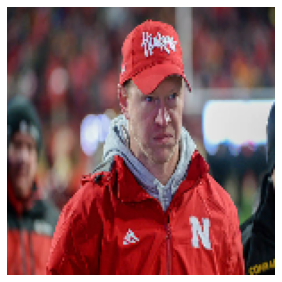

(array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.3254902 , 0.49803925, 0.2509804 ],
         [0.31764707, 0.4901961 , 0.24313727],
         [0.3137255 , 0.48627454, 0.2392157 ]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.32941177, 0.5019608 , 0.25490198],
         [0.32156864, 0.49411768, 0.24705884],
         [0.3137255 , 0.48627454, 0.2392157 ]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.33333334, 0.5058824 , 0.25882354],
         [0.3254902 , 0.49803925, 0.2509804 ],
         [0.31764707, 0.4901961 , 0.24313727]],

        ...,

        [[0.96470594, 0.9725491 , 0.9686275 ],
         [0.86666673, 0.8705883 , 0.89019614

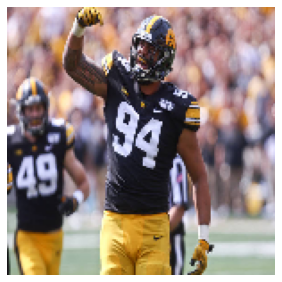

(array([[[[0.6039216 , 0.3803922 , 0.27450982],
         [0.7176471 , 0.5529412 , 0.38823533],
         [0.6156863 , 0.4431373 , 0.30588236],
         ...,
         [0.74509805, 0.30980393, 0.23137257],
         [0.72156864, 0.28235295, 0.18823531],
         [0.6627451 , 0.20392159, 0.13333334]],

        [[0.7294118 , 0.4666667 , 0.36078432],
         [0.6784314 , 0.4784314 , 0.3019608 ],
         [0.6156863 , 0.4039216 , 0.2627451 ],
         ...,
         [0.7725491 , 0.23137257, 0.18823531],
         [0.7490196 , 0.14901961, 0.15686275],
         [0.7176471 , 0.09019608, 0.12156864]],

        [[0.6784314 , 0.35686275, 0.2627451 ],
         [0.70980394, 0.43529415, 0.29411766],
         [0.65882355, 0.3647059 , 0.20784315],
         ...,
         [0.7960785 , 0.1254902 , 0.15686275],
         [0.7607844 , 0.09803922, 0.11764707],
         [0.74509805, 0.10196079, 0.10588236]],

        ...,

        [[0.38431376, 0.43921572, 0.20784315],
         [0.43137258, 0.48235297, 0.27450982

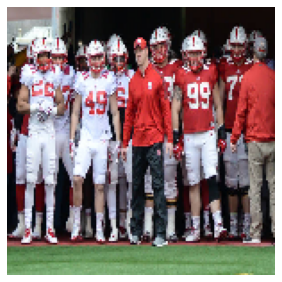

(array([[[[0.3254902 , 0.32941177, 0.26666668],
         [0.46274513, 0.27450982, 0.42352945],
         [1.        , 0.9960785 , 0.8980393 ],
         ...,
         [0.44705886, 0.4156863 , 0.40784317],
         [0.6039216 , 0.5686275 , 0.5882353 ],
         [0.654902  , 0.6431373 , 0.67058825]],

        [[0.6666667 , 0.5411765 , 0.49803925],
         [0.        , 0.03137255, 0.02745098],
         [1.        , 0.9803922 , 0.9725491 ],
         ...,
         [0.27058825, 0.2509804 , 0.26666668],
         [0.45882356, 0.4431373 , 0.44705886],
         [0.54901963, 0.5411765 , 0.5529412 ]],

        [[0.8000001 , 0.67058825, 0.6509804 ],
         [0.16862746, 0.16078432, 0.20392159],
         [0.97647065, 0.97647065, 1.        ],
         ...,
         [0.13725491, 0.12941177, 0.14901961],
         [0.3019608 , 0.29803923, 0.2901961 ],
         [0.47450984, 0.4666667 , 0.47058827]],

        ...,

        [[0.34117648, 0.427451  , 0.23529413],
         [0.36078432, 0.44705886, 0.25490198

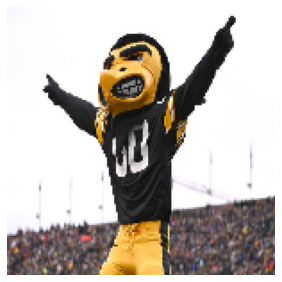

(array([[[[0.47450984, 0.21176472, 0.18039216],
         [0.47058827, 0.20784315, 0.1764706 ],
         [0.46274513, 0.20000002, 0.16862746],
         ...,
         [0.35686275, 0.3137255 , 0.3372549 ],
         [0.3529412 , 0.30980393, 0.33333334],
         [0.4156863 , 0.37647063, 0.40784317]],

        [[0.47450984, 0.21176472, 0.18039216],
         [0.47058827, 0.20784315, 0.1764706 ],
         [0.4784314 , 0.21568629, 0.18431373],
         ...,
         [0.30980393, 0.28627452, 0.3019608 ],
         [0.32156864, 0.29803923, 0.3137255 ],
         [0.3921569 , 0.36862746, 0.40784317]],

        [[0.4666667 , 0.20392159, 0.17254902],
         [0.46274513, 0.20000002, 0.16862746],
         [0.47450984, 0.21176472, 0.18039216],
         ...,
         [0.18431373, 0.16470589, 0.18039216],
         [0.19607845, 0.1764706 , 0.19215688],
         [0.28235295, 0.27058825, 0.3137255 ]],

        ...,

        [[0.64705884, 0.6745098 , 0.6117647 ],
         [0.63529414, 0.6627451 , 0.6       

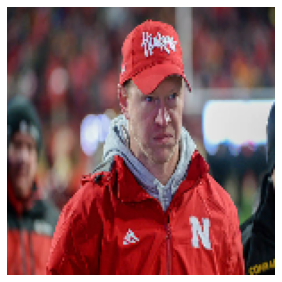

(array([[[[0.6784314 , 0.48235297, 0.3921569 ],
         [0.7725491 , 0.5764706 , 0.32941177],
         [0.82745105, 0.6156863 , 0.22352943],
         ...,
         [0.03137255, 0.03137255, 0.02352941],
         [0.03137255, 0.03137255, 0.02352941],
         [0.08235294, 0.08235294, 0.07450981]],

        [[0.6862745 , 0.47450984, 0.3647059 ],
         [0.77647066, 0.5686275 , 0.29411766],
         [0.82745105, 0.6156863 , 0.22352943],
         ...,
         [0.02745098, 0.02745098, 0.01960784],
         [0.03137255, 0.03137255, 0.02352941],
         [0.0627451 , 0.0627451 , 0.05490196]],

        [[0.6901961 , 0.47058827, 0.33333334],
         [0.7843138 , 0.5647059 , 0.27058825],
         [0.82745105, 0.6156863 , 0.22352943],
         ...,
         [0.02745098, 0.02745098, 0.01960784],
         [0.03529412, 0.03529412, 0.02745098],
         [0.06666667, 0.06666667, 0.05882353]],

        ...,

        [[0.22352943, 0.26666668, 0.3372549 ],
         [0.57254905, 0.44705886, 0.20784315

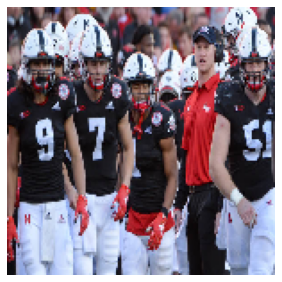

(array([[[[0.77647066, 0.76470596, 0.69803923],
         [0.7686275 , 0.7568628 , 0.6901961 ],
         [0.79215693, 0.7725491 , 0.69803923],
         ...,
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07450981, 0.05490196, 0.03137255]],

        [[0.77647066, 0.76470596, 0.69803923],
         [0.7686275 , 0.7568628 , 0.6901961 ],
         [0.8000001 , 0.7803922 , 0.7058824 ],
         ...,
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07058824, 0.0509804 , 0.03921569],
         [0.06666667, 0.04705883, 0.03529412]],

        [[0.77647066, 0.76470596, 0.69803923],
         [0.7686275 , 0.7568628 , 0.6901961 ],
         [0.7803922 , 0.7607844 , 0.6862745 ],
         ...,
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07058824, 0.0509804 , 0.03921569],
         [0.07058824, 0.04705883, 0.04705883]],

        ...,

        [[0.35686275, 0.36078432, 0.2901961 ],
         [0.35686275, 0.36078432, 0.2901961 

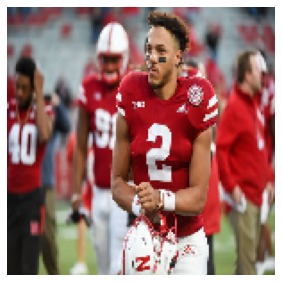

(array([[[[0.24313727, 0.227451  , 0.28627452],
         [0.19215688, 0.18039216, 0.3019608 ],
         [0.62352943, 0.6509804 , 0.7137255 ],
         ...,
         [0.42352945, 0.36862746, 0.41960788],
         [0.3647059 , 0.2784314 , 0.2901961 ],
         [0.4431373 , 0.36078432, 0.38823533]],

        [[0.36078432, 0.3254902 , 0.44705886],
         [0.10196079, 0.09019608, 0.17254902],
         [0.54509807, 0.5568628 , 0.62352943],
         ...,
         [0.45882356, 0.37647063, 0.41176474],
         [0.39607847, 0.32156864, 0.3372549 ],
         [0.63529414, 0.58431375, 0.56078434]],

        [[0.5254902 , 0.454902  , 0.5019608 ],
         [0.23529413, 0.18039216, 0.23137257],
         [0.3647059 , 0.36862746, 0.43921572],
         ...,
         [0.5686275 , 0.5568628 , 0.6       ],
         [0.64705884, 0.654902  , 0.7019608 ],
         [0.70980394, 0.7137255 , 0.73333335]],

        ...,

        [[0.29411766, 0.3529412 , 0.18431373],
         [0.34117648, 0.40000004, 0.23137257

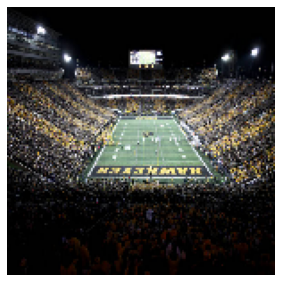

(array([[[[1.        , 0.6       , 0.58431375],
         [0.9843138 , 0.6117647 , 0.5882353 ],
         [1.        , 0.6156863 , 0.6039216 ],
         ...,
         [0.49411768, 0.06666667, 0.05490196],
         [0.49411768, 0.06666667, 0.05490196],
         [0.47450984, 0.0627451 , 0.04705883]],

        [[0.9843138 , 0.454902  , 0.43921572],
         [0.9843138 , 0.4784314 , 0.454902  ],
         [1.        , 0.5019608 , 0.48235297],
         ...,
         [0.49411768, 0.06666667, 0.05490196],
         [0.49411768, 0.06666667, 0.05490196],
         [0.4901961 , 0.0627451 , 0.0509804 ]],

        [[1.        , 0.36862746, 0.36078432],
         [1.        , 0.37647063, 0.3647059 ],
         [1.        , 0.3647059 , 0.36862746],
         ...,
         [0.49411768, 0.06666667, 0.05490196],
         [0.49411768, 0.06666667, 0.05490196],
         [0.5058824 , 0.05882353, 0.05490196]],

        ...,

        [[0.09019608, 0.08627451, 0.06666667],
         [0.13333334, 0.10588236, 0.07450981

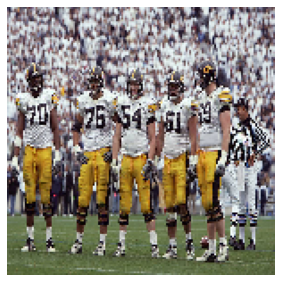

(array([[[[0.8000001 , 0.8117648 , 0.8313726 ],
         [0.8078432 , 0.8196079 , 0.83921576],
         [0.8078432 , 0.8196079 , 0.83921576],
         ...,
         [0.7019608 , 0.73333335, 0.74509805],
         [0.69803923, 0.7294118 , 0.7411765 ],
         [0.6862745 , 0.7176471 , 0.7294118 ]],

        [[0.7803922 , 0.79215693, 0.8117648 ],
         [0.78823537, 0.8000001 , 0.8196079 ],
         [0.79215693, 0.80392164, 0.8235295 ],
         ...,
         [0.7019608 , 0.73333335, 0.74509805],
         [0.69803923, 0.7294118 , 0.7411765 ],
         [0.6862745 , 0.7176471 , 0.7294118 ]],

        [[0.7294118 , 0.7411765 , 0.7607844 ],
         [0.7372549 , 0.7490196 , 0.7686275 ],
         [0.74509805, 0.7568628 , 0.77647066],
         ...,
         [0.7019608 , 0.73333335, 0.74509805],
         [0.69803923, 0.7294118 , 0.7411765 ],
         [0.6862745 , 0.7176471 , 0.7294118 ]],

        ...,

        [[0.01568628, 0.01568628, 0.01568628],
         [0.01568628, 0.01568628, 0.01568628

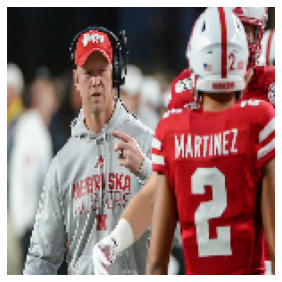

(array([[[[0.20000002, 0.18823531, 0.21568629],
         [0.23137257, 0.20784315, 0.22352943],
         [0.25490198, 0.22352943, 0.21568629],
         ...,
         [0.2784314 , 0.3019608 , 0.35686275],
         [0.2784314 , 0.3019608 , 0.35686275],
         [0.2784314 , 0.3019608 , 0.35686275]],

        [[0.18823531, 0.18823531, 0.227451  ],
         [0.20000002, 0.18823531, 0.21568629],
         [0.21568629, 0.20000002, 0.20392159],
         ...,
         [0.2784314 , 0.3019608 , 0.35686275],
         [0.2784314 , 0.3019608 , 0.35686275],
         [0.2784314 , 0.3019608 , 0.35686275]],

        [[0.20000002, 0.21568629, 0.25882354],
         [0.20392159, 0.20000002, 0.23137257],
         [0.20392159, 0.19607845, 0.21568629],
         ...,
         [0.2784314 , 0.3019608 , 0.35686275],
         [0.2784314 , 0.3019608 , 0.35686275],
         [0.2784314 , 0.3019608 , 0.35686275]],

        ...,

        [[0.5019608 , 0.6392157 , 0.48235297],
         [0.6039216 , 0.7372549 , 0.60784316

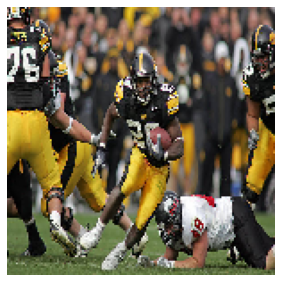

(array([[[[0.10588236, 0.3372549 , 0.57254905],
         [0.11764707, 0.34901962, 0.58431375],
         [0.13725491, 0.34901962, 0.6       ],
         ...,
         [0.24313727, 0.43921572, 0.6862745 ],
         [0.2392157 , 0.43529415, 0.68235296],
         [0.23529413, 0.43137258, 0.6784314 ]],

        [[0.1137255 , 0.34509805, 0.5803922 ],
         [0.12941177, 0.36078432, 0.59607846],
         [0.14509805, 0.35686275, 0.60784316],
         ...,
         [0.2509804 , 0.44705886, 0.69411767],
         [0.24313727, 0.43921572, 0.6862745 ],
         [0.2392157 , 0.43529415, 0.68235296]],

        [[0.12156864, 0.3529412 , 0.5882353 ],
         [0.13333334, 0.3647059 , 0.6       ],
         [0.15294118, 0.3647059 , 0.6156863 ],
         ...,
         [0.2509804 , 0.44705886, 0.69411767],
         [0.24705884, 0.4431373 , 0.6901961 ],
         [0.24313727, 0.43921572, 0.6862745 ]],

        ...,

        [[0.7960785 , 0.2392157 , 0.23529413],
         [0.7607844 , 0.20392159, 0.20000002

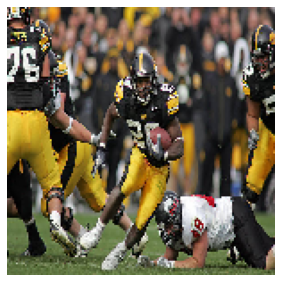

In [135]:
pred_images=[]
pred=[]
#plotting predictions
for _ in range(39):
#     plt.subplot(3, 13, n+1)
    print(test_generator.next())
    print('---------'*4)
    img, label = test_generator.next()
#     pred_images.append(img[0])
#     pred = model.predict(img[0])
#     predictions = model.predict_classes(test_generator)
    plt.imshow(img[0])
#     plt.title(pred)
    plt.axis('off')
    plt.tight_layout(pad=1)
    plt.show()

In [114]:
num_predictions = 36

predict_gen = model.predict_generator(test_generator)

indices = [np.random.choice(range(len(x_test))) 
           for i in range(num_predictions)]

cifar_grid(x_test,y_test,indices,6,labels,predictions=predict_gen)

C:\Users\loosm\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


NameError: name 'cifar_grid' is not defined

In [42]:
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt


Iowa_images=[]
Neb_images=[]
Iowa_array=[]
Neb_array=[]

for image in os.listdir(Iowa_dir):
    #get images from folder
    image_path = Iowa_dir.joinpath(image)
    img = load_img(image_path, target_size = (224,224))
    Iowa_images.append(img)
    #convert image to numpy array and preprocess
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    Iowa_array.append(img)


for image in os.listdir(Neb_dir):
    #get images from folder
    image_path = Neb_dir.joinpath(image)
    img = load_img(image_path, target_size = (224,224))
    Neb_images.append(img)
    #convert image to numpy array and preprocess
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    Neb_array.append(img)

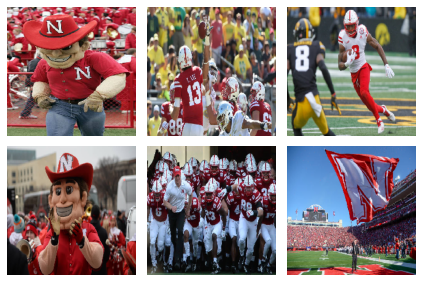

In [43]:
 #plot images and predictions
for n in range(6):
    plt.subplot(2,3, n+1)
    plt.imshow(Neb_images[n])
    plt.axis('off')
    plt.tight_layout(pad=1)


In [47]:
#build covnet
model_test = models.Sequential()
model_test.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(150, 150, 3)))
model_test.add(layers.MaxPooling2D((2, 2)))
model_test.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_test.add(layers.MaxPooling2D((2, 2)))
model_test.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_test.add(layers.MaxPooling2D((2, 2)))
model_test.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_test.add(layers.MaxPooling2D((2, 2)))
model_test.add(layers.Flatten())
model_test.add(layers.Dropout(0.5))
model_test.add(layers.Dense(512, activation='relu'))
model_test.add(layers.Dense(14, activation='softmax'))

model_test.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])
model_test.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 73, 73, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 15, 15, 128)     

In [48]:
history_test = model_test.fit(
train_generator,
# steps_per_epoch=200,
epochs=20,
validation_data=validation_generator,
validation_steps=50
)

Epoch 1/20
209/209 [==============================] - 156s 733ms/step - loss: 2.5732 - accuracy: 0.1027 - val_loss: 2.3785 - val_accuracy: 0.1780
Epoch 2/20
209/209 [==============================] - 157s 749ms/step - loss: 2.2171 - accuracy: 0.2006 - val_loss: 2.2692 - val_accuracy: 0.1980
Epoch 3/20
209/209 [==============================] - 150s 714ms/step - loss: 2.1083 - accuracy: 0.2452 - val_loss: 2.0649 - val_accuracy: 0.2700
Epoch 4/20
190/209 [==========================>...] - ETA: 13s - loss: 2.0543 - accuracy: 0.2735

KeyboardInterrupt: 

In [ ]:
history_test = model.fit(
train_generator,
# steps_per_epoch=200,
epochs=20,
validation_data=validation_generator
)

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

#build covnet
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

odel.compile(optimizer=optimizers.RMSprop(lr=.001),loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


In [ ]:
hist = model.fit(train_gen, validation_data=validation_gen, epochs=1)

In [ ]:
from keras import layers
from keras import models

In [30]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [31]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [32]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [29]:
from keras.datasets import cifar10
from keras import utils

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Exception: URL fetch failure on https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1108)

In [27]:
x_train[0], x_train[1]

NameError: name 'x_train' is not defined